In [18]:
!pip install seaborn
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/9.7 MB ? eta -:--:--Downloading statsmodels-0.14.5-cp311-cp311-macosx_11_0_arm64.whl (9.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 19.1 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 19.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels]


In [15]:
# Imports and load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Adjust this path if your notebook is in a different folder
csv_path = '/Users/ashz/Desktop/STA304/STA304-Project/wardParkingData/Parking_Tags_Data_2024_with_wards.csv'
df = pd.read_csv(csv_path)
print('Rows loaded:', len(df))
df.head()

/var/folders/t8/582vs1ss411dmw449198qfbw0000gn/T/ipykernel_75287/3226629803.py:9: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


Rows loaded: 1849768


,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province,city,AREA_L_CD,AREA_NAME
0,***20590,2024-10-01,3,PARK ON PRIVATE PROPERTY,75,0.0,AT,2350 DUNDAS ST W,NaN,NaN,ON,Toronto,4,Parkdale-High Park
1,***20591,2024-10-01,3,PARK ON PRIVATE PROPERTY,75,1.0,AT,2350 DUNDAS ST W,NaN,NaN,ON,Toronto,4,Parkdale-High Park
2,***31262,2024-10-01,3,PARK ON PRIVATE PROPERTY,75,352.0,AT,5229 DUNDAS ST W,NaN,NaN,ON,Toronto,3,Etobicoke-Lakeshore
3,***18262,2024-10-01,403,STOP-SIGNED HIGHWAY-RUSH HOUR,190,719.0,NR,1395 DUNDAS ST W,NaN,NaN,ON,Toronto,9,Davenport
4,***89331,2024-10-01,3,PARK ON PRIVATE PROPERTY,75,725.0,NaN,3446 DUNDAS ST W,NaN,NaN,ON,Toronto,4,Parkdale-High Park


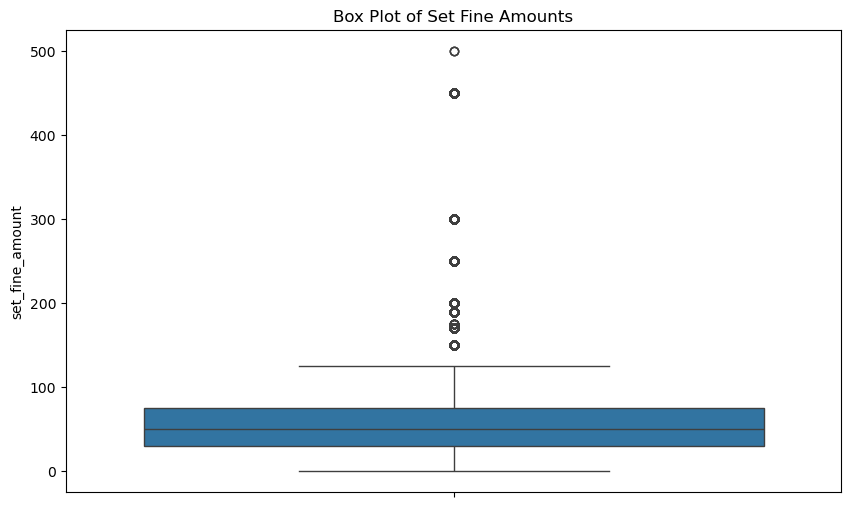

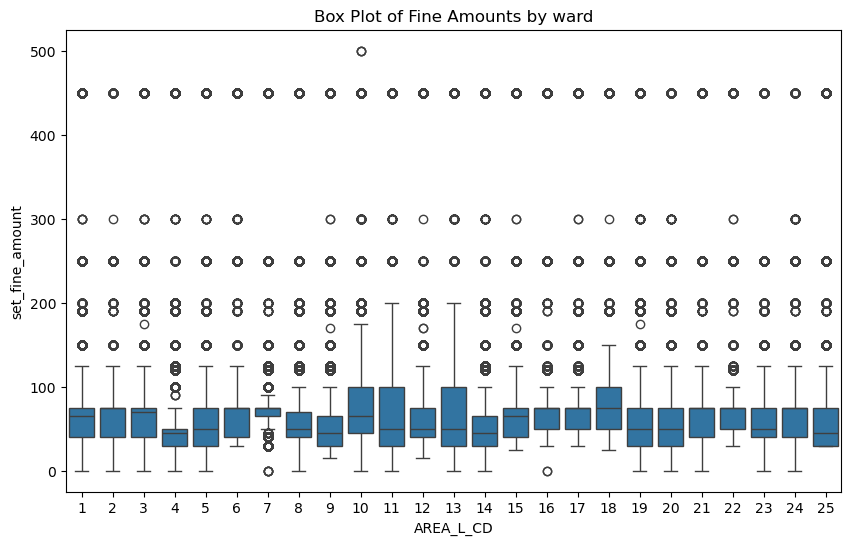

In [8]:
# Create box plot function
def create_box_plot(data,x_col, y_col, title, output_path):
    plt.figure(figsize=(10, 6))
    if x_col is None:
        sns.boxplot(y=y_col, data=data)
    else:
        sns.boxplot(x=x_col, y=y_col, data=data)
        
    plt.title(title)
    plt.savefig(output_path)
    plt.show()
    plt.close()

# box plot for set_fine_amount
create_box_plot(df, None, "set_fine_amount", "Box Plot of Set Fine Amounts", "figures_graphics/set_fine_amount_boxplot.png")

# box plot for set_fine_amount by AREA_NAME
create_box_plot(df, "AREA_L_CD", "set_fine_amount", "Box Plot of Fine Amounts by ward", "figures_graphics/set_fine_amount_by_area_name_boxplot.png")


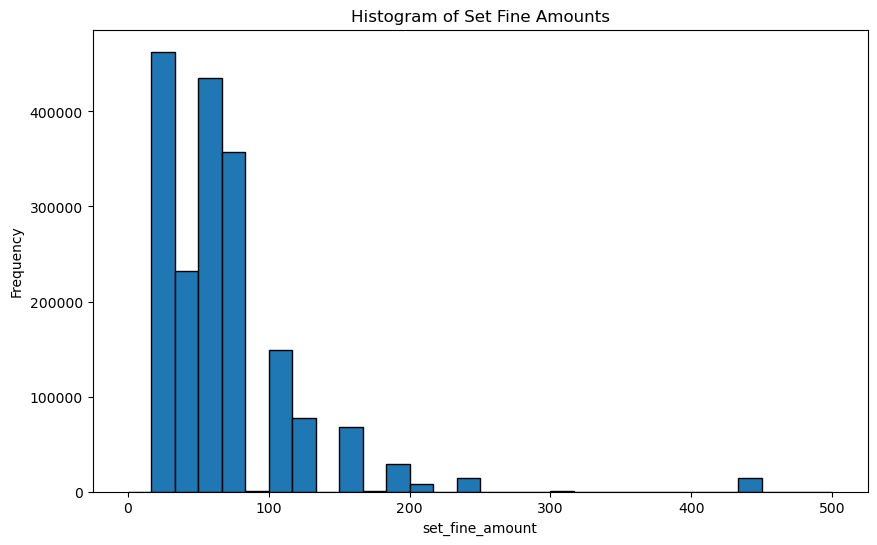

In [10]:
def create_histogram(data, col, bins, title, output_path):
    #col is the one we want to plot, like 'set_fine_amount'
    plt.figure(figsize=(10, 6))
    plt.hist(data[col], bins=bins, edgecolor='black')
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.savefig(output_path)
    plt.show()
    plt.close()
    
# histogram for set_fine_amount
create_histogram(df, "set_fine_amount", bins=30, title="Histogram of Set Fine Amounts", output_path="figures_graphics/set_fine_amount_histogram.png")

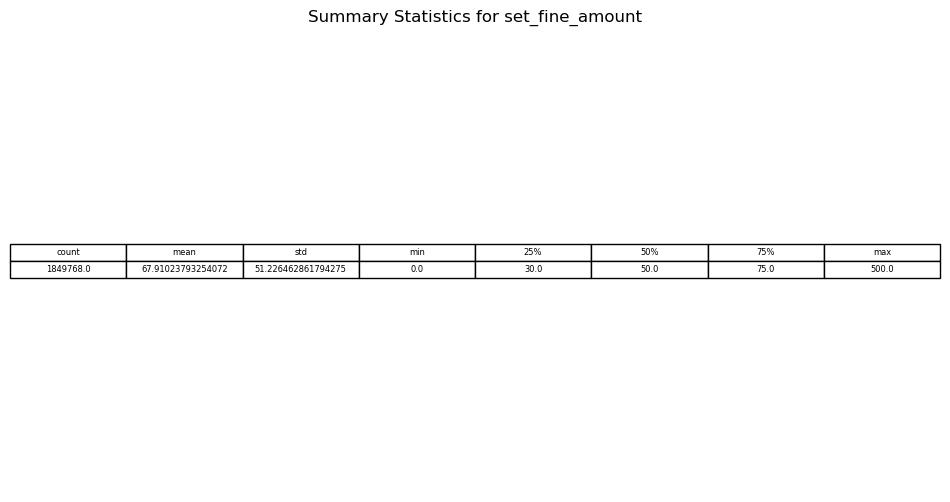

count    1.849768e+06
mean     6.791024e+01
std      5.122646e+01
min      0.000000e+00
25%      3.000000e+01
50%      5.000000e+01
75%      7.500000e+01
max      5.000000e+02
Name: set_fine_amount, dtype: float64

In [13]:
def create_summary_statistics(data, col):
    summary = data[col].describe()
    plt.figure(figsize=(12, 6))
    plt.table(cellText=[summary.values], colLabels=summary.index, loc='center', cellLoc='center')
    plt.axis('off')
    plt.title(f'Summary Statistics for {col}')
    plt.savefig(f'figures_graphics/summary_stats_{col}.png', dpi=200)
    plt.show()
    plt.close()
    return summary

# summary statistics for set_fine_amount
create_summary_statistics(df, "set_fine_amount")

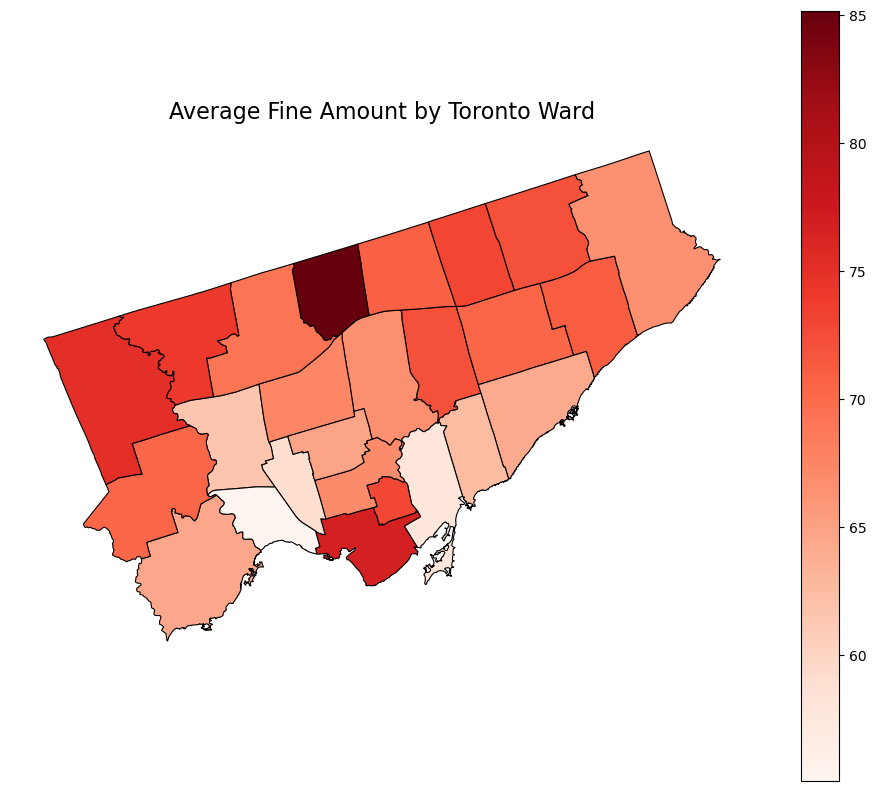

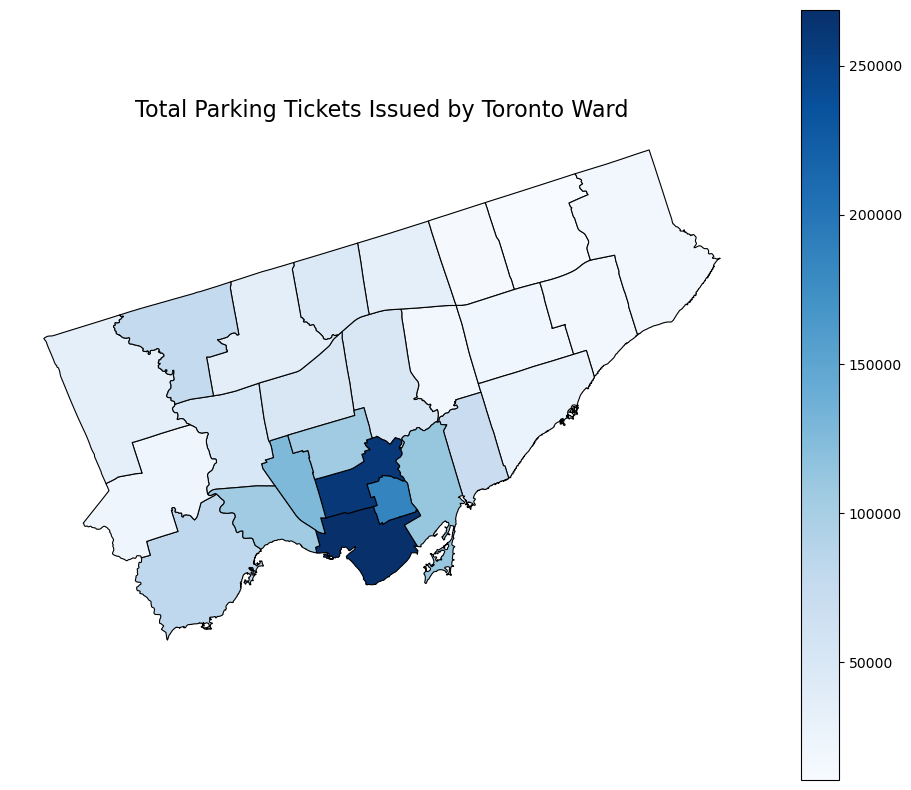

In [21]:
import geopandas as gpd

# Group by ward to compute the statistic
ward_stats = df.groupby("AREA_NAME").agg(
    avg_fine=("set_fine_amount", "mean"),
    total_tickets=("tag_number_masked", "count")
).reset_index()

wards = gpd.read_file("mapping_to_wards/WARD.shp")

merged = wards.merge(ward_stats, on="AREA_NAME", how="left")

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

merged.plot(
    column="avg_fine",
    cmap="Reds",
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    ax=ax
)

ax.set_title("Average Fine Amount by Toronto Ward", fontsize=16)
ax.axis("off")

plt.savefig("figures_graphics/avg_fine_by_ward_map.png", dpi=200)
plt.show()

merged.plot(
    column="total_tickets",
    cmap="Blues",
    linewidth=0.8,
    edgecolor="black",
    legend=True,
    figsize=(12, 10)
)

plt.title("Total Parking Tickets Issued by Toronto Ward", fontsize=16)
plt.axis("off")

plt.savefig("figures_graphics/total_tickets_by_ward_map.png", dpi=200)
plt.show()

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Fit model: fine amount ~ ward
model = smf.ols("set_fine_amount ~ C(AREA_NAME)", data=df).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                    sum_sq         df            F  PR(>F)
C(AREA_NAME)  9.144324e+07       24.0  1479.808353     0.0
Residual      4.762624e+09  1849743.0          NaN     NaN


## How to open & run this notebook

- In VS Code: open the repository folder and click the file to open the notebook editor.
- Jupyter Lab / Notebook: install `jupyterlab` or `notebook`, then run:

```bash
python3 -m pip install jupyterlab pandas matplotlib seaborn
python3 -m jupyter lab
```

Notes: Adjust `csv_path` if your CSV is stored elsewhere. If plots show many missing values for `hour`, inspect `time_of_infraction` formats first.